<a href="https://colab.research.google.com/github/Zfeng0207/FIT3199-FYP/blob/dev%2Fzfeng/01_DL_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion and Exploratory Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Ingestion

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_sampled_data.csv')

## Data Profiling

In [5]:
df.head()

,subject_id,stay_id_x,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
0,19538920,38706636.0,2197-09-19 18:15:00,NaN,56.0,18.0,97.0,219.0,55.0,NaN,...,M79641,10,Pain in right hand,NaN,0,F,63,2192,2008 - 2010,2201-08-13
1,13615149,39751441.0,2137-03-17 12:52:00,NaN,104.0,NaN,NaN,123.0,81.0,NaN,...,30590,9,DRUG ABUSE NEC-UNSPEC,NaN,0,F,37,2133,2008 - 2010,NaN
2,19093092,34824448.0,2130-07-17 14:55:00,98.3,85.0,16.0,99.0,122.0,69.0,NaN,...,E9289,9,ACCIDENT NOS,NaN,0,M,30,2121,2008 - 2010,NaN
3,10870950,34905829.0,2154-10-27 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78605,9,SHORTNESS OF BREATH,NaN,0,F,36,2154,2011 - 2013,NaN
4,11818101,35366775.0,2165-07-16 22:00:00,97.8,75.0,17.0,98.0,131.0,81.0,NaN,...,71941,9,JOINT PAIN-SHLDER,NaN,0,M,44,2154,2008 - 2010,NaN


##### Insights
**Observations**


**Key Takeaway**


## Data Quality Check

Check for null values

In [6]:
df.isnull().sum()

,0
subject_id,0
stay_id_x,1875
charttime,1875
temperature,1138511
heartrate,139195
resprate,175671
o2sat,275880
sbp,169971
dbp,169971
rhythm,3063423


note: category has 257 null values

In [7]:
df.duplicated().sum()

0

note: no duplicated rows

##### Insights
**Observations**

**Key Takeaway**


## Exploratory Data Analysis

> Add blockquote



### Overview of the merged dataset

In [8]:
df.describe()

,subject_id,stay_id_x,temperature,heartrate,resprate,o2sat,sbp,dbp,stay_id_y,seq_num,icd_version,numeric_part,Stroke_Y/N,anchor_age,anchor_year
count,3.183237e+06,3.181362e+06,2.044726e+06,3.044042e+06,3.007566e+06,2.907357e+06,3.013266e+06,3.013266e+06,3.183237e+06,3.183237e+06,3.183237e+06,22010.000000,3.183237e+06,3.183237e+06,3.183237e+06
mean,1.502819e+07,3.501052e+07,9.792553e+01,8.231354e+01,1.769825e+01,9.781800e+01,1.305073e+02,7.573333e+01,3.497302e+07,2.025621e+00,9.544263e+00,431.046343,6.914345e-03,5.370492e+01,2.154702e+03
std,2.798435e+06,2.887968e+06,6.849984e+00,1.727185e+01,5.480331e+01,2.564937e+01,2.388597e+01,1.493006e+02,2.903880e+06,1.237671e+00,4.980370e-01,22.971298,8.286458e-02,1.686833e+01,2.390576e+01
min,1.000003e+07,3.000001e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000002e+07,1.000000e+00,9.000000e+00,34.000000,0.000000e+00,1.800000e+01,2.110000e+03
25%,1.260654e+07,3.251799e+07,9.780000e+01,7.000000e+01,1.600000e+01,9.700000e+01,1.140000e+02,6.300000e+01,3.247398e+07,1.000000e+00,9.000000e+00,431.000000,0.000000e+00,4.300000e+01,2.135000e+03
50%,1.522957e+07,3.500776e+07,9.810000e+01,8.100000e+01,1.800000e+01,9.800000e+01,1.280000e+02,7.400000e+01,3.493878e+07,2.000000e+00,1.000000e+01,433.000000,0.000000e+00,5.300000e+01,2.154000e+03
75%,1.735632e+07,3.752241e+07,9.840000e+01,9.200000e+01,1.800000e+01,1.000000e+02,1.450000e+02,8.400000e+01,3.748088e+07,3.000000e+00,1.000000e+01,433.000000,0.000000e+00,6.500000e+01,2.175000e+03
max,1.999999e+07,3.999996e+07,9.890000e+02,1.007000e+03,9.445200e+04,9.997000e+03,8.540000e+02,7.481000e+04,3.999996e+07,9.000000e+00,1.000000e+01,436.000000,1.000000e+00,9.100000e+01,2.207000e+03


In [9]:
print(df.dtypes)

subject_id             int64
stay_id_x            float64
charttime             object
temperature          float64
heartrate            float64
resprate             float64
o2sat                float64
sbp                  float64
dbp                  float64
rhythm                object
pain                  object
stay_id_y              int64
seq_num                int64
icd_code              object
icd_version            int64
icd_title             object
numeric_part         float64
Stroke_Y/N             int64
gender                object
anchor_age             int64
anchor_year            int64
anchor_year_group     object
dod                   object
dtype: object


In [10]:
# Convert datetime columns
df['charttime'] = pd.to_datetime(df['charttime'])
df['dod'] = pd.to_datetime(df['dod'])

# Convert categorical columns to numerical representation
df['rhythm'] = df['rhythm'].astype('category').cat.codes
df['pain'] = df['pain'].astype('category').cat.codes
df['icd_code'] = df['icd_code'].astype('category').cat.codes
df['icd_title'] = df['icd_title'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['anchor_year_group'] = df['anchor_year_group'].astype('category').cat.codes

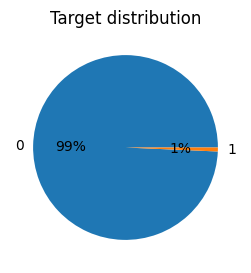

In [11]:
targets = df['Stroke_Y/N']

temp = targets.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'stay_id_x'}>,
        <Axes: title={'center': 'charttime'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'heartrate'}>],
       [<Axes: title={'center': 'resprate'}>,
        <Axes: title={'center': 'o2sat'}>,
        <Axes: title={'center': 'sbp'}>, <Axes: title={'center': 'dbp'}>,
        <Axes: title={'center': 'rhythm'}>],
       [<Axes: title={'center': 'pain'}>,
        <Axes: title={'center': 'stay_id_y'}>,
        <Axes: title={'center': 'seq_num'}>,
        <Axes: title={'center': 'icd_code'}>,
        <Axes: title={'center': 'icd_version'}>],
       [<Axes: title={'center': 'icd_title'}>,
        <Axes: title={'center': 'numeric_part'}>,
        <Axes: title={'center': 'Stroke_Y/N'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'anchor_age'}>],
       [<Axes: title={'center': 'anchor_year'}>,
        <Axes: title={'center': 'anc

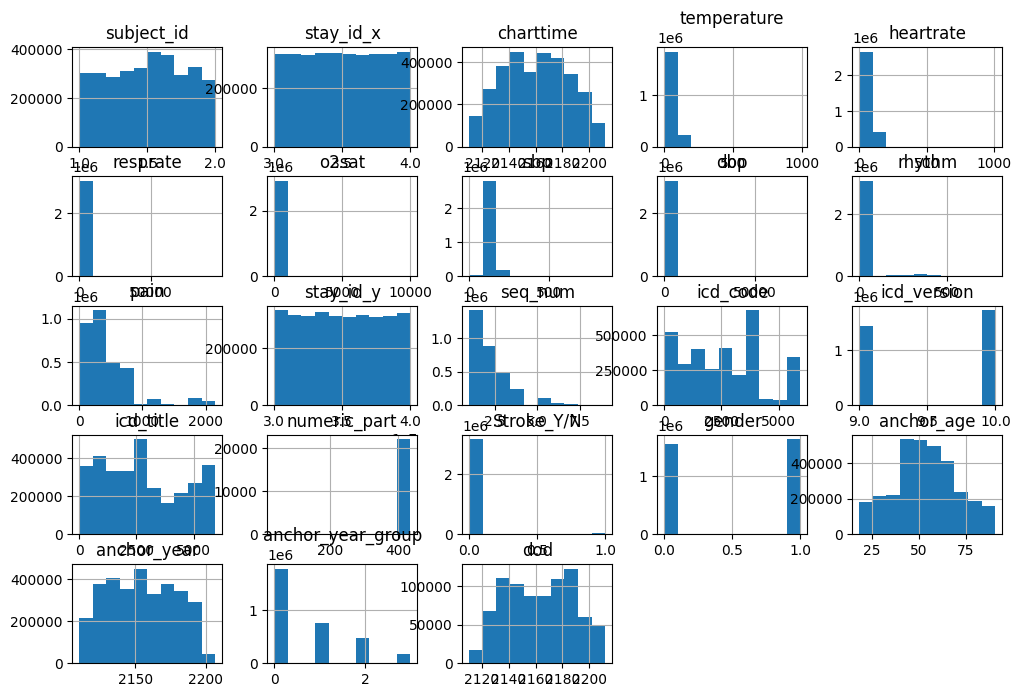

In [12]:
df.hist(figsize=(12, 8))

In [13]:
import seaborn as sns

corr_matrix = df.corr()
correlations = corr_matrix['Stroke_Y/N'].sort_values(ascending=False)
print(correlations)

Stroke_Y/N           1.000000
icd_code             0.045783
anchor_age           0.033851
icd_title            0.013548
seq_num              0.013061
subject_id           0.010919
rhythm               0.010747
pain                 0.008048
anchor_year_group    0.007869
dod                  0.006654
stay_id_y            0.001878
temperature          0.000614
resprate             0.000546
stay_id_x            0.000286
o2sat                0.000057
dbp                 -0.001903
anchor_year         -0.002429
gender              -0.003656
sbp                 -0.004708
charttime           -0.011010
heartrate           -0.013947
icd_version         -0.044646
numeric_part              NaN
Name: Stroke_Y/N, dtype: float64


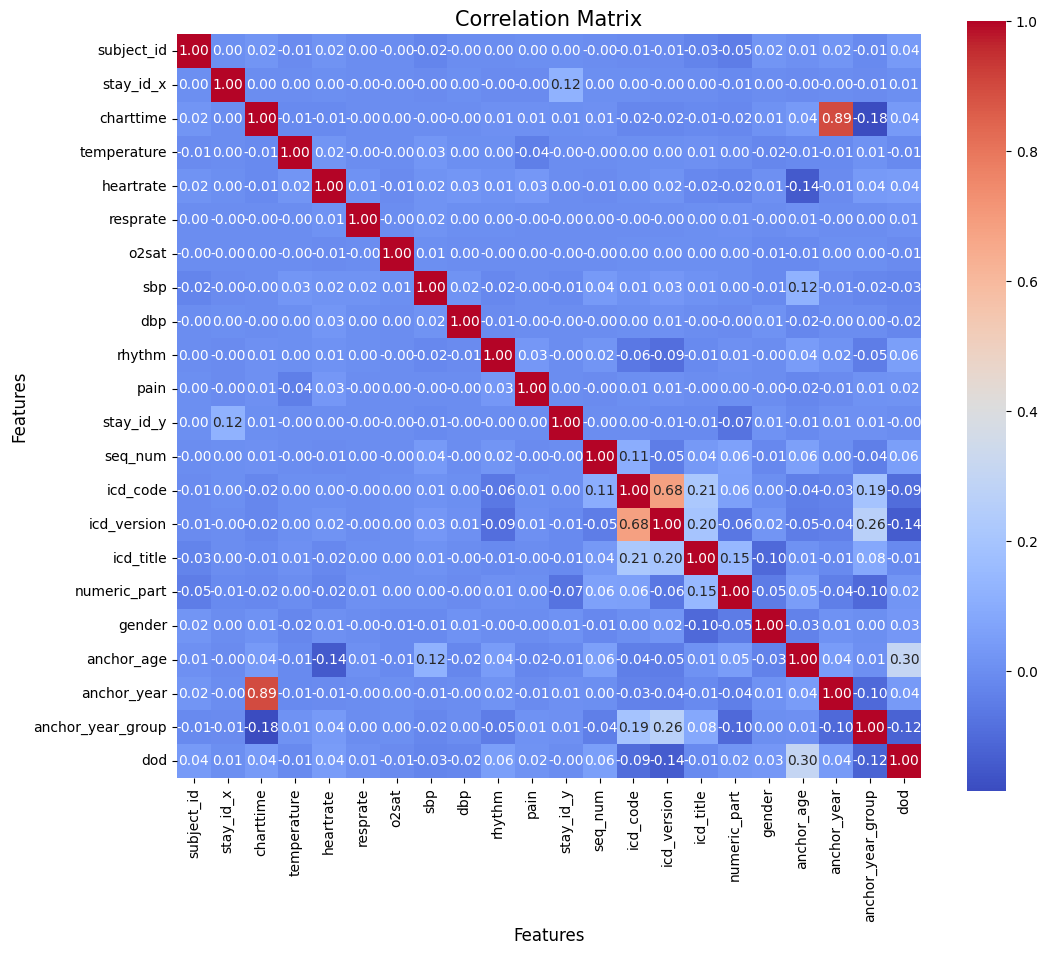

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_inputs = df.drop('Stroke_Y/N', axis=1)

# Compute the correlation matrix
corr_matrix = df_inputs.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add titles and labels
plt.title('Correlation Matrix', size=15)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)

# Display the plot
plt.show()


<ipython-input-15-27578e74abff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


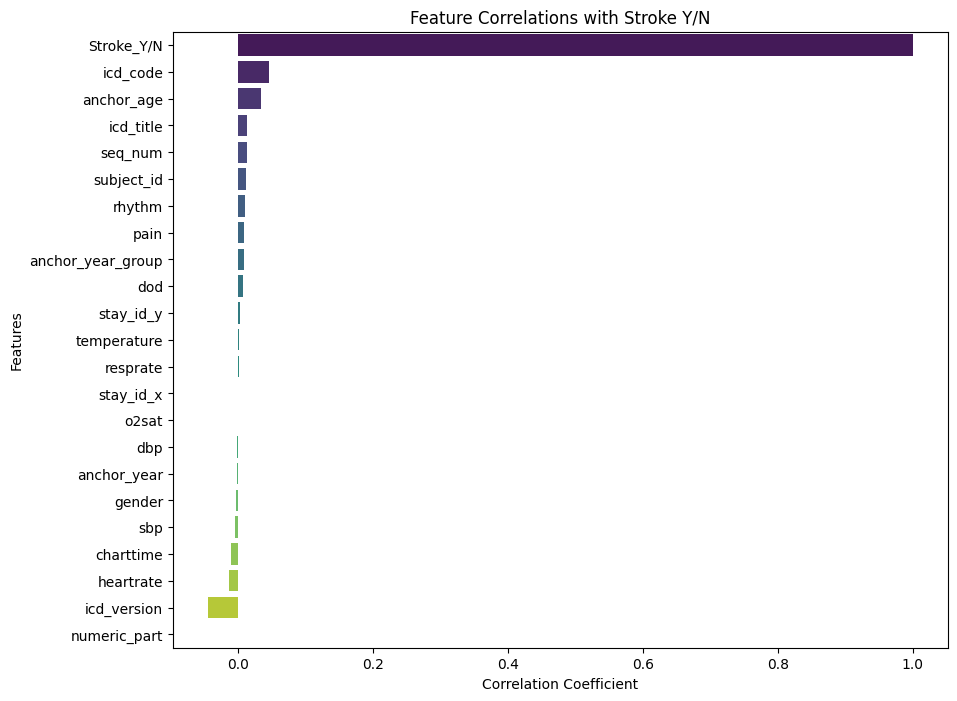

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

correlations = corr_matrix['Stroke_Y/N'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

# Add titles and labels
plt.title('Feature Correlations with Stroke Y/N')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Display the plot
plt.show()


In [16]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/01_preprocessed_output', index = False)

## Sequential Time Series Analysis


In [21]:
 df.sort_values(by=['subject_id', 'charttime'])

,subject_id,stay_id_x,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
657521,10000032,33258284.0,2180-05-06 23:04:00,97.7,79.0,16.0,98.0,107.0,60.0,-1,...,839,9,1056,NaN,0,0,52,2180,2,2180-09-09
769398,10000032,33258284.0,2180-05-06 23:04:00,97.7,79.0,16.0,98.0,107.0,60.0,-1,...,641,9,2578,NaN,0,0,52,2180,2,2180-09-09
2210090,10000032,33258284.0,2180-05-06 23:04:00,97.7,79.0,16.0,98.0,107.0,60.0,-1,...,839,9,1056,NaN,0,0,52,2180,2,2180-09-09
531207,10000032,38112554.0,2180-06-26 18:42:00,97.9,76.0,18.0,95.0,95.0,64.0,-1,...,839,9,1056,NaN,0,0,52,2180,2,2180-09-09
1711078,10000032,38112554.0,2180-06-26 18:42:00,97.9,76.0,18.0,95.0,95.0,64.0,-1,...,641,9,2578,NaN,0,0,52,2180,2,2180-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156831,19999828,32917002.0,2149-01-08 17:10:00,98.1,109.0,15.0,96.0,111.0,78.0,-1,...,5887,10,3132,NaN,0,0,46,2147,3,NaT
2402261,19999914,32002659.0,2158-12-24 11:43:00,99.5,81.0,10.0,100.0,93.0,55.0,-1,...,4042,10,683,NaN,0,0,49,2158,3,NaT
3045601,19999987,34731548.0,2145-11-02 19:40:00,NaN,112.0,18.0,NaN,118.0,83.0,-1,...,574,9,2761,431.0,1,0,57,2145,1,NaT
448305,19999987,34731548.0,2145-11-02 20:11:00,NaN,111.0,18.0,NaN,123.0,82.0,-1,...,574,9,2761,431.0,1,0,57,2145,1,NaT


In [22]:
sequence_length = 3  # Define how many past admissions to consider
sequences = []

for subject_id, group in df.groupby('subject_id'):
    group = group.sort_values(by='charttime')  # Ensure chronological order

    # Create rolling sequences of length N
    for i in range(len(group) - sequence_length):
        input_seq = group.iloc[i:i + sequence_length].drop(columns=['subject_id'])
        target = group.iloc[i + sequence_length]['Stroke_Y/N']
        sequences.append((input_seq.values, target))

# Convert to NumPy arrays for deep learning models
import numpy as np
X, y = zip(*sequences)  # Unzip sequences into features and labels
X = np.array(X)  # Shape: (num_samples, sequence_length, num_features)
y = np.array(y)  # Shape: (num_samples, )

KeyboardInterrupt: 